# Bank Marketing Dataset
Predicting Term Deposit Suscriptions

## Importing libs

In [1]:
# Data
import pandas as pd

# Export
import pickle

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Modeling
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

## Loading data

In [5]:
df = pd.read_csv("../data/bank.csv")
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
884,47,admin.,divorced,secondary,no,555,yes,yes,telephone,17,oct,478,1,-1,0,unknown,yes
6623,28,blue-collar,married,secondary,no,-470,yes,no,cellular,7,may,275,2,-1,0,unknown,no
1414,30,blue-collar,single,tertiary,no,297,no,no,cellular,7,apr,465,4,-1,0,unknown,yes


# Check data

In [6]:
print("Shape")
print(df.shape)

print("\nTypes")
print(df.dtypes)

Shape
(11162, 17)

Types
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object


### Check missings

In [7]:
pd.DataFrame(df.isnull().sum()).T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


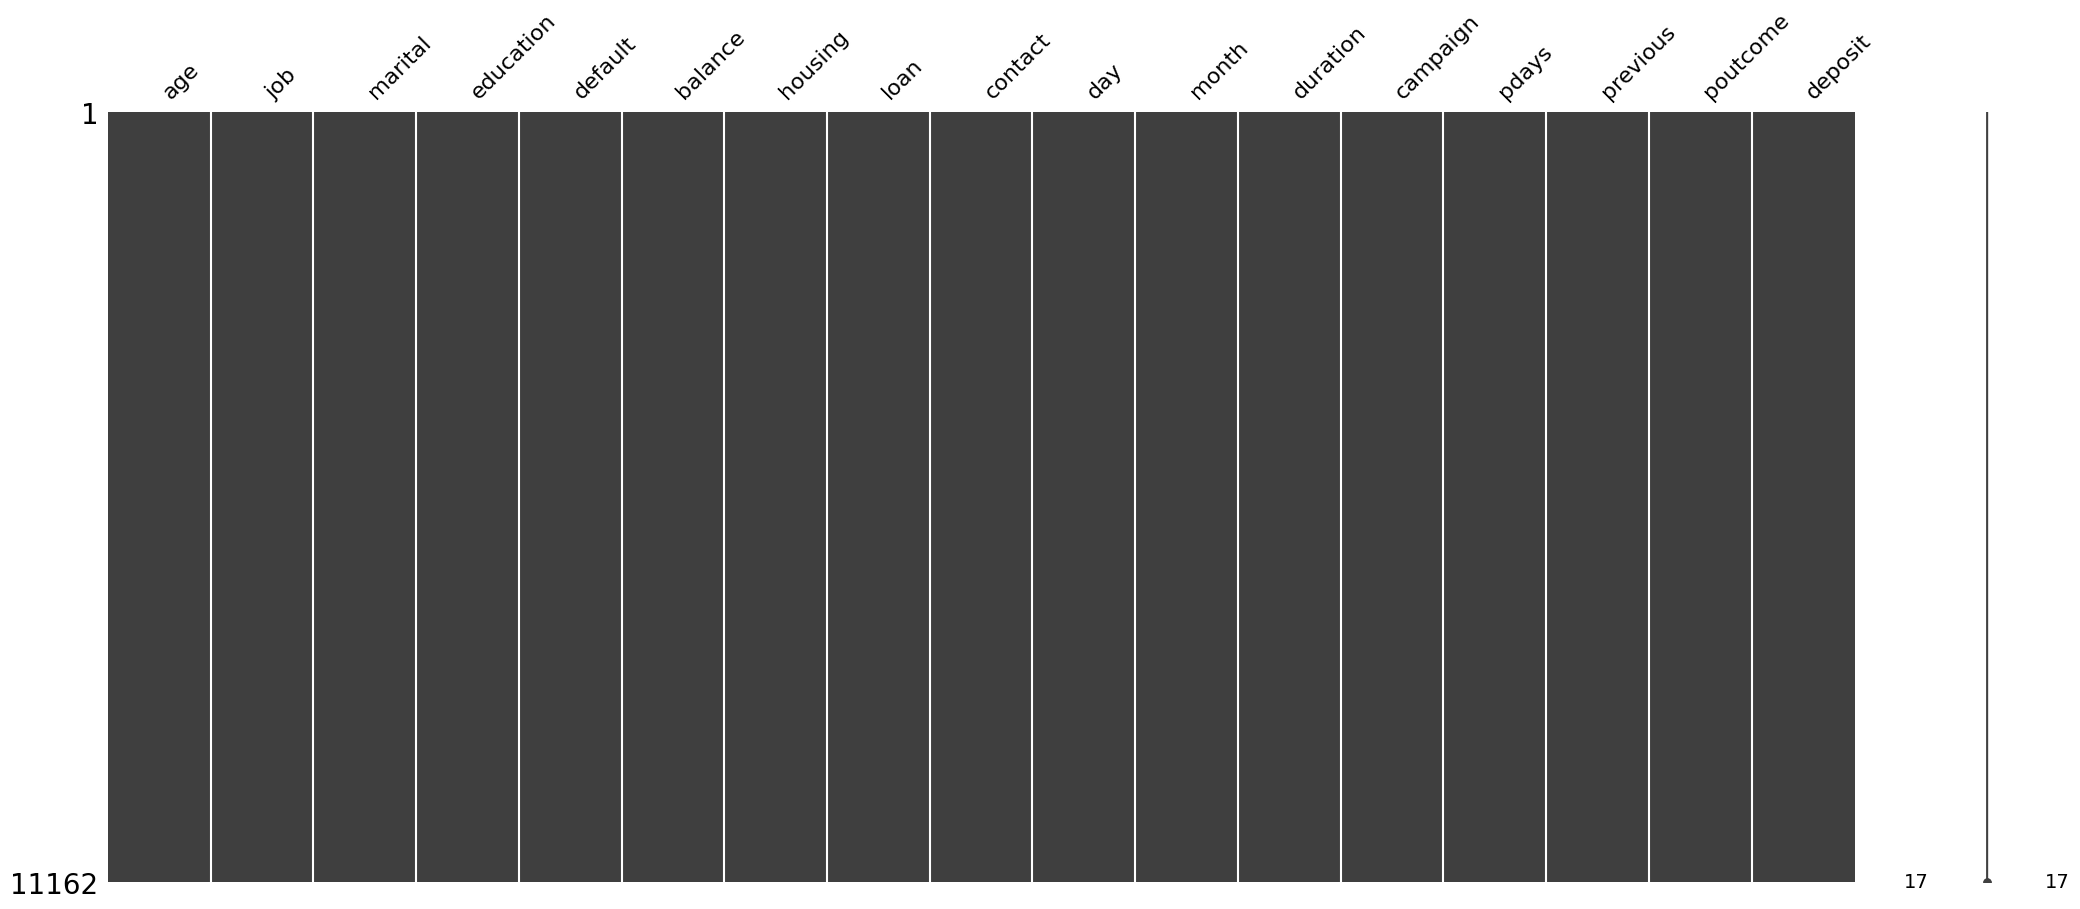

In [8]:
msno.matrix(df)
plt.show()

In [9]:
cat_cols = ["job", "marital", "education", "housing"]
num_cols = ["age", "balance", "duration", "campaign"]

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


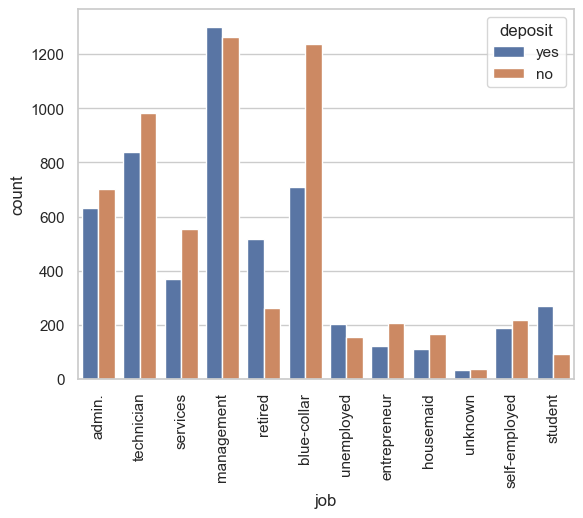

In [11]:
sns.set(style="whitegrid")
g = sns.countplot(data=df, x="job", hue="deposit")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

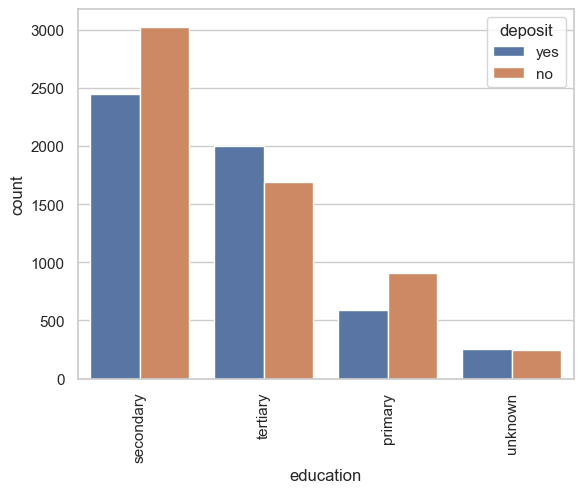

In [12]:
sns.set(style="whitegrid")
g = sns.countplot(data=df, x="education", hue="deposit")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

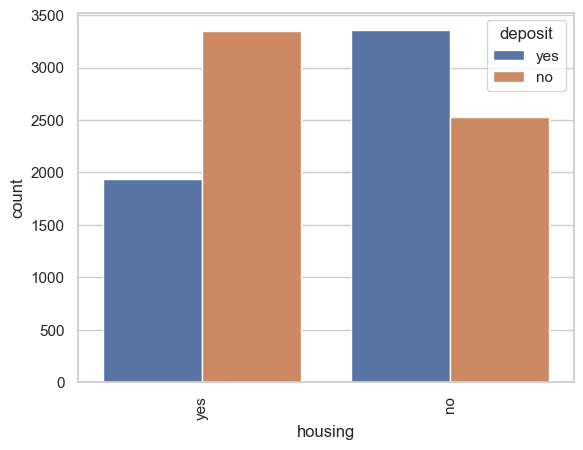

In [13]:
sns.set(style="whitegrid")
g = sns.countplot(data=df, x="housing", hue="deposit")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

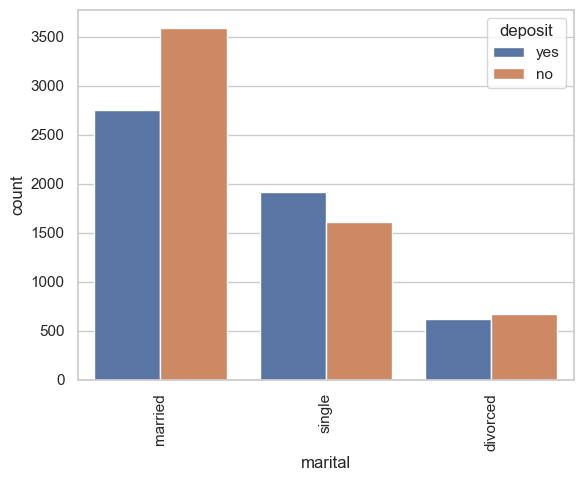

In [14]:
sns.set(style="whitegrid")
g = sns.countplot(data=df, x="marital", hue="deposit")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

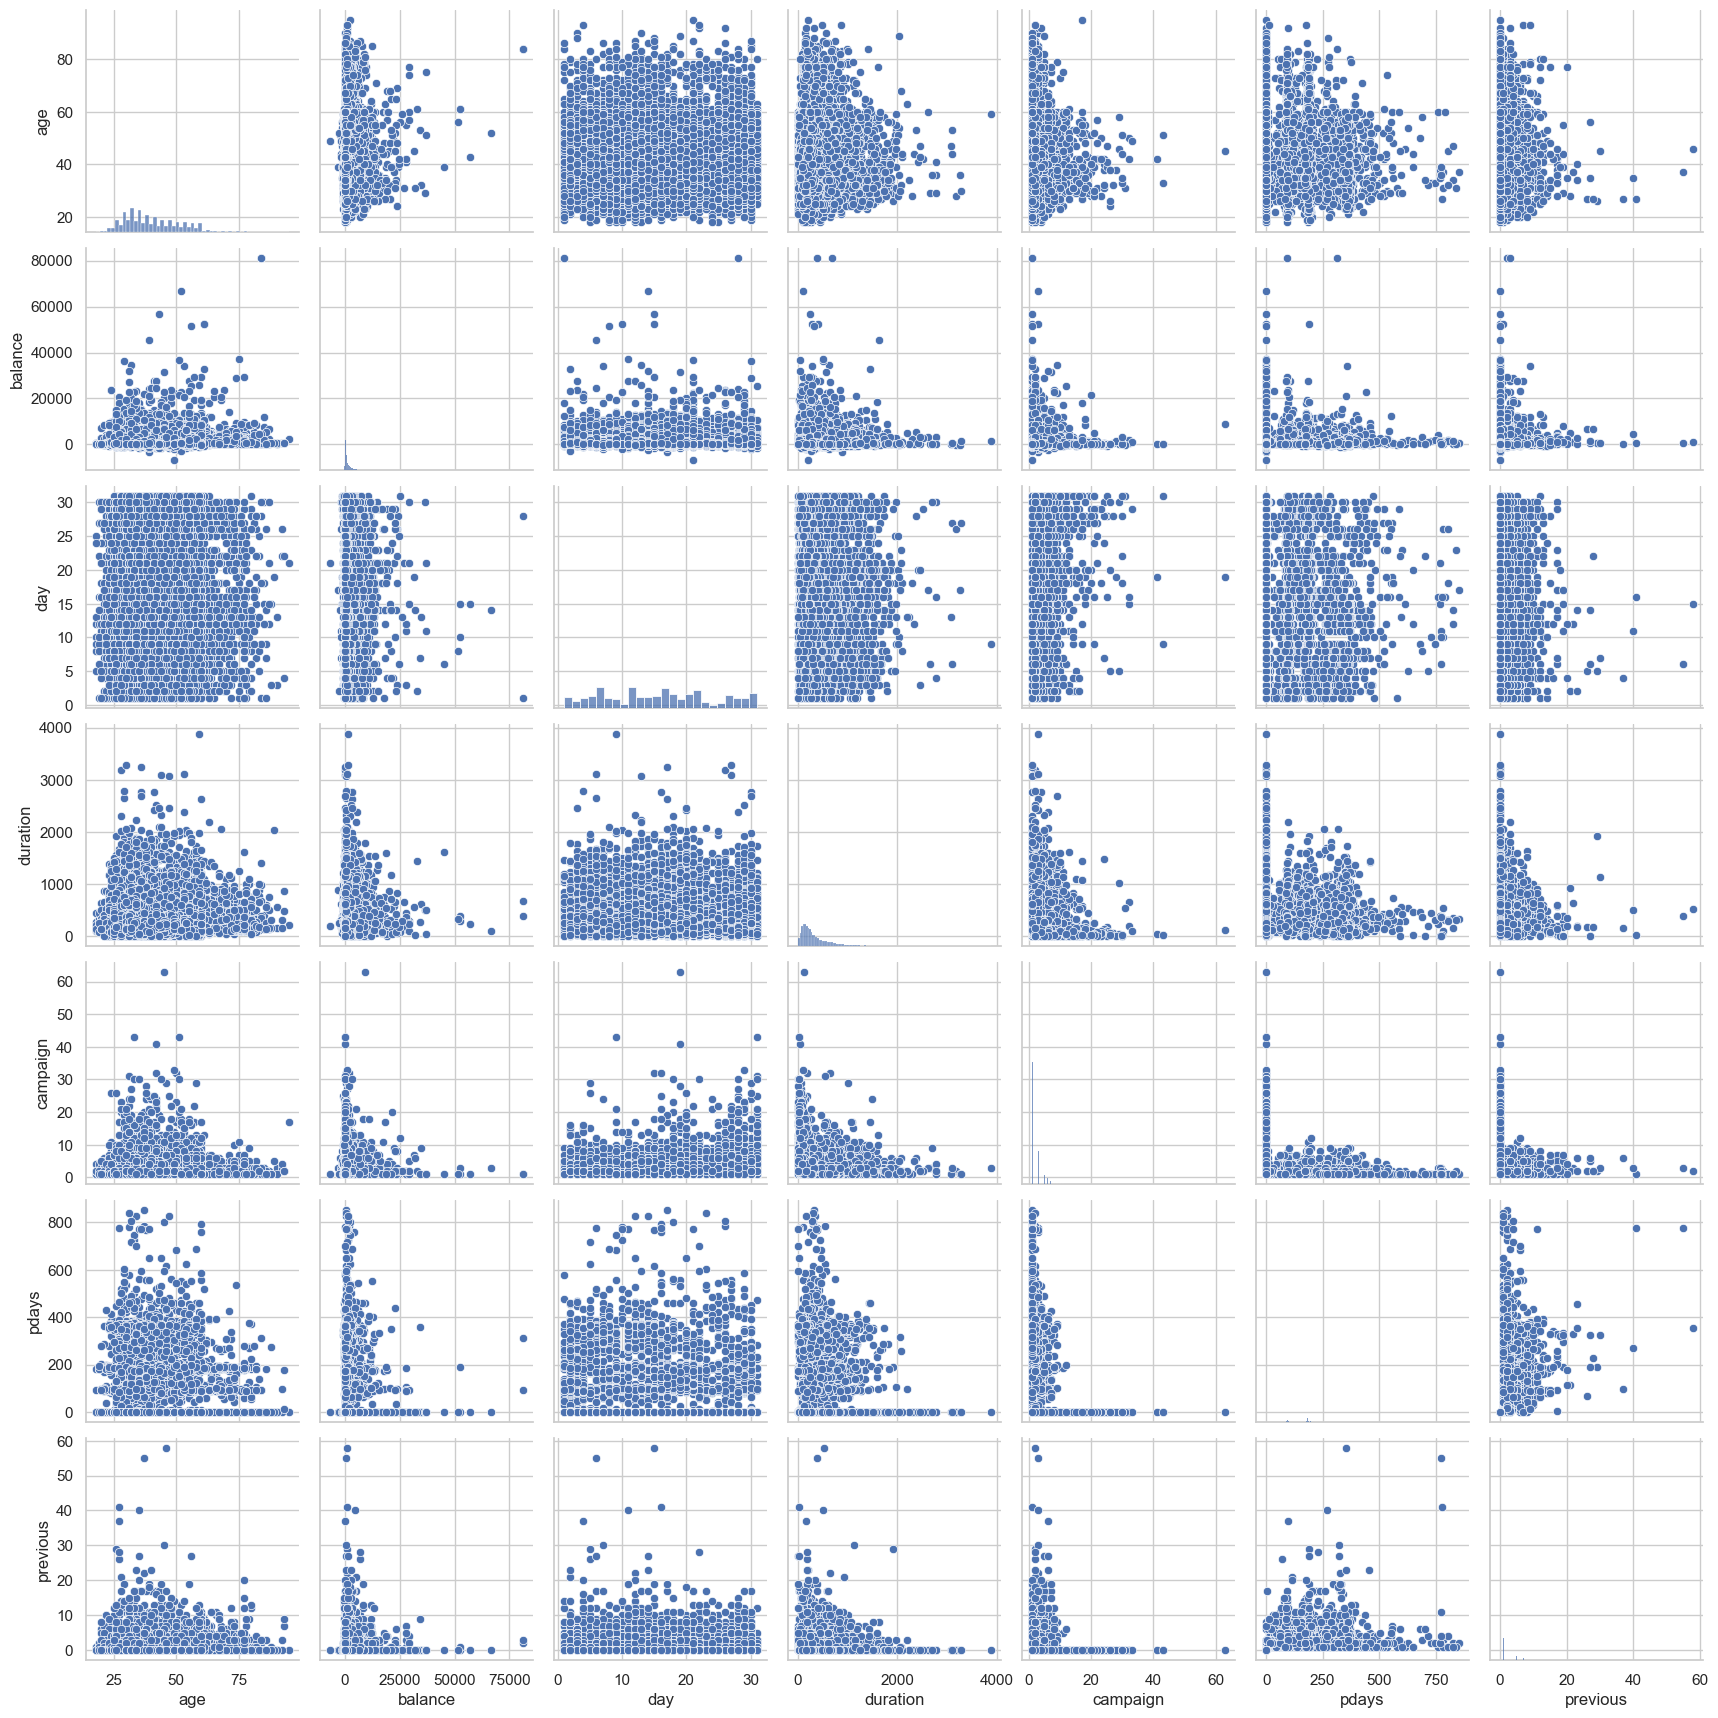

In [15]:
sns.pairplot(df)

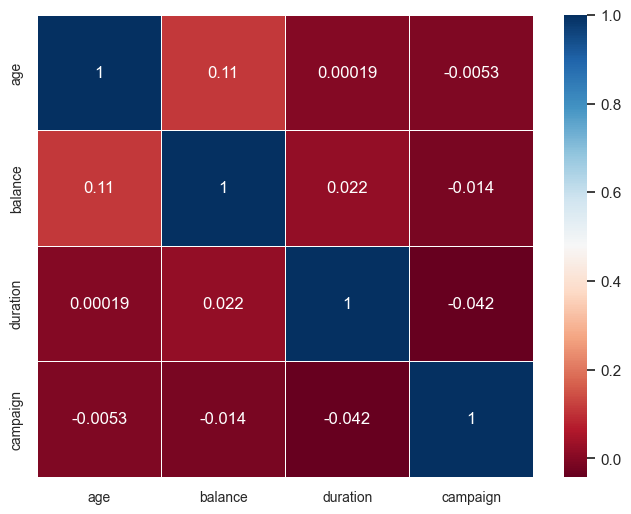

In [16]:
def correlation_matrix(df, cols):
     fig = plt.gcf()
     fig.set_size_inches(8, 6)
     plt.xticks(fontsize=10)
     plt.yticks(fontsize=10)
     fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={"size": 12}, linecolor="w", cmap="RdBu")
     plt.show(block=True)

correlation_matrix(df, num_cols)

# References

- https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset
- https://www.kaggle.com/code/enesztrk/bank-credit-analysis-classification